<h1 align="center"> Homework 7 Programming Task</h1>
<h3 align="center"> IST 5520, 2022 Fall </h3>
<h3 align="center"> Student: Estelle Lu </h3>

# **Instruction:**

Complete the following tasks and type your answers to questions directly on the jupyter notebook (1 point for each task and question, 13 points in total). You can add additional code lines if necessary.

In [18]:
# Import modules and set inline mode
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
df = pd.read_csv('/Users/estellelu/Downloads/wine.data')

# Task: Principal Component Analysis of the Wine Dataset

(1) Load Wine Dataset

The data file 'wine.data' is the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The first column is the class of the wine, other columns are attributes of the wine. These columns are:

- 1) Class
- 2) Alcohol
- 3) Malic acid
- 4) Ash
- 5) Alcalinity of ash
- 6) Magnesium
- 7) Total phenols
- 8) Flavanoids
- 9) Nonflavanoid phenols
- 10) Proanthocyanins
- 11) Color intensity
- 12) Hue
- 13) OD280/OD315 of diluted wines
- 14) Proline

For detailed description of the dataset, refer to https://archive.ics.uci.edu/ml/datasets/Wine.

Create a pandas DataFrame from the data file. The data file itself does not include column names, so you need to manually set the column names for your DataFrame. Then show information of the dataset.

Tip: Set the header parameter of the pd.read_csv() function correctly so that the first row will not be treated as column header.

In [75]:
df = pd.read_csv('wine.data')
#number of observations in the dataset
df.shape
#finding missing values
print(df.isnull())
print(df.isna())

         1  14.23   1.71   2.43   15.6    127    2.8   3.06    .28   2.29  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
172  False  False  False  False  False  False  False  False  False  False   
173  False  False  False  False  False  False  False  False  False  False   
174  False  False  False  False  False  False  False  False  False  False   
175  False  False  False  False  False  False  False  False  False  False   
176  False  False  False  False  False  False  False  False  False  False   

      5.64   1.04   3.92   1065  
0    False  False  False  False  
1    Fa

In [76]:
#counting missing values
print(df.isnull().values.sum())

0


**Question 1**: How many observations are in the dataset? Does the dataset contain missing values?

Your Answer: there are 177 observations in in the dataset. The dataset contains no missing values.


(2) Sample observations

Randomly select 5 obvervations from the dataset and show them below.

In [57]:
df = pd.read_csv('wine.data')
df = df.sample(5)
df

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
99,2,12.08,2.08,1.70,17.5,97,2.23,2.17,0.26,1.40,3.3,1.27,2.96,710
77,2,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.4,1.06,2.31,750
120,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.0,0.93,3.69,465
95,2,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.5,0.95,2.26,625
117,2,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.4,0.70,2.12,372


(3) Convert the value of Class variable

Convert Class integer values into strings by using the following mapping:

- 1: 'Class 1'
- 2: 'Class 2'
- 3: 'Class 3'

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
1,1.000000,-0.321238,0.436127,-0.048260,0.513963,-0.198944,-0.717933,-0.846485,0.487215,-0.494887,0.268562,-0.617690,-0.786428,-0.631227
14.23,-0.321238,1.000000,0.099963,0.210964,-0.303350,0.258742,0.284543,0.230133,-0.151445,0.127561,0.547883,-0.075375,0.057417,0.641068
1.71,0.436127,0.099963,1.000000,0.164955,0.286148,-0.049049,-0.333512,-0.409324,0.291501,-0.217975,0.250053,-0.560854,-0.366720,-0.189512
2.43,-0.048260,0.210964,0.164955,1.000000,0.446698,0.287107,0.128176,0.114084,0.187354,0.008082,0.258643,-0.075181,0.001503,0.222979
15.6,0.513963,-0.303350,0.286148,0.446698,1.000000,-0.071707,-0.317583,-0.346922,0.359395,-0.190779,0.020478,-0.272719,-0.268186,-0.436858
127,-0.198944,0.258742,-0.049049,0.287107,-0.071707,1.000000,0.208200,0.187101,-0.252091,0.226504,0.199337,0.052042,0.046961,0.387542
2.8,-0.717933,0.284543,-0.333512,0.128176,-0.317583,0.208200,1.000000,0.864046,-0.448301,0.610533,-0.056401,0.432987,0.699566,0.495839
3.06,-0.846485,0.230133,-0.409324,0.114084,-0.346922,0.187101,0.864046,1.000000,-0.536326,0.650254,-0.174411,0.543208,0.786372,0.491180
.28,0.487215,-0.151445,0.291501,0.187354,0.359395,-0.252091,-0.448301,-0.536326,1.000000,-0.363268,0.140192,-0.261709,-0.501859,-0.308886
2.29,-0.494887,0.127561,-0.217975,0.008082,-0.190779,0.226504,0.610533,0.650254,-0.363268,1.000000,-0.027112,0.294397,0.513415,0.325731


(4) Normalize dataset

Standardize all columns except Class so that these columns have mean = 0 and standard error = 1.

In [71]:
data_norm = scale(df.loc[:,'1':'1065'])
type(data_norm)
pd.DataFrame(data_norm).describe().transpose()
pd.DataFrame(data_norm).corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,-0.321238,0.436127,-0.048260,0.513963,-0.198944,-0.717933,-0.846485,0.487215,-0.494887,0.268562,-0.617690,-0.786428,-0.631227
1,-0.321238,1.000000,0.099963,0.210964,-0.303350,0.258742,0.284543,0.230133,-0.151445,0.127561,0.547883,-0.075375,0.057417,0.641068
2,0.436127,0.099963,1.000000,0.164955,0.286148,-0.049049,-0.333512,-0.409324,0.291501,-0.217975,0.250053,-0.560854,-0.366720,-0.189512
3,-0.048260,0.210964,0.164955,1.000000,0.446698,0.287107,0.128176,0.114084,0.187354,0.008082,0.258643,-0.075181,0.001503,0.222979
4,0.513963,-0.303350,0.286148,0.446698,1.000000,-0.071707,-0.317583,-0.346922,0.359395,-0.190779,0.020478,-0.272719,-0.268186,-0.436858
5,-0.198944,0.258742,-0.049049,0.287107,-0.071707,1.000000,0.208200,0.187101,-0.252091,0.226504,0.199337,0.052042,0.046961,0.387542
6,-0.717933,0.284543,-0.333512,0.128176,-0.317583,0.208200,1.000000,0.864046,-0.448301,0.610533,-0.056401,0.432987,0.699566,0.495839
7,-0.846485,0.230133,-0.409324,0.114084,-0.346922,0.187101,0.864046,1.000000,-0.536326,0.650254,-0.174411,0.543208,0.786372,0.491180
8,0.487215,-0.151445,0.291501,0.187354,0.359395,-0.252091,-0.448301,-0.536326,1.000000,-0.363268,0.140192,-0.261709,-0.501859,-0.308886
9,-0.494887,0.127561,-0.217975,0.008082,-0.190779,0.226504,0.610533,0.650254,-0.363268,1.000000,-0.027112,0.294397,0.513415,0.325731


(5) Principal component analysis with full components

In [97]:
# Select the number of components
pca1 = PCA(n_components=14)
# Fit the PCA model
pca1.fit(data_norm)

#The amount of variance that each PC explains
var = pca1.explained_variance_ratio_

print(var)

[0.39335457 0.17867003 0.10381022 0.06658994 0.06339193 0.04825297
 0.03965751 0.02516055 0.02112046 0.01840911 0.01613186 0.01202693
 0.00928314 0.00414078]


(6) Draw a scree plot to show the cumulative variance explained along the number of principal components.

In [100]:
var1 = pd.DataFrame(var1, index=np.arange(1,14))
plt.plot(var1,color='blue')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.savefig('scree_plot.png',dpi=100,bbox_inches='tight')

ValueError: Shape of passed values is (14, 1), indices imply (13, 1)

**Question 2**: What is the least number of components we need to keep in order to keep 90% variance of the original predictors?

Your answer: 


(7) Principal component analysis with two componenets.

In [104]:
# Select the number of components
pca2 = PCA(n_components=2)
pca2.fit(data_norm)
data_pca2 = pca2.fit_transform(data_norm)

# Convert the numpy array to pandas DataFrame
data_pca2 = pd.DataFrame(data_pca2)
data_pca2.index = df.name
data_pca2.columns = ["PC"+str(i) for i in range(1,3)]

# Show the head of the DataFrame
data_pca2.head()

AttributeError: 'DataFrame' object has no attribute 'name'

(8) Run a correlation analysis on the dimension-reduced dataset.

In [92]:
data_pca2.corr()

,PC1,PC2
PC1,1.000000e+00,-3.785637e-17
PC2,-3.785637e-17,1.000000e+00


**Question 3**: What conclusion do you get from the correlation analysis?

Your answer:
The correlations between the two components are close to zero. The components are not correlated and tehere is no multicolinearlity among the principal components.

(9) Plot wine class onto the reduced two-dimensional space.

With the two-component solution, draw a scatter plot to show the reduced dataset. Actually, one popular use of PCA is to reduce dimension to two, thus allowing plot a multi-dimensional data on a 2D space.

The scatter plot should use "Principal Component 1" as x axis, "Principal Component 2" as y axis. Use different colors to represent points for different classes of the wine.

A sample scatter plot can be found here:
https://github.com/chenla-mst/datascience/blob/master/HW7_2D_plot.png

You can refer to "Data Summarization and Visualization" jupyter notebook section 4.6 for scatter plot.

AttributeError: 'DataFrame' object has no attribute 'name'

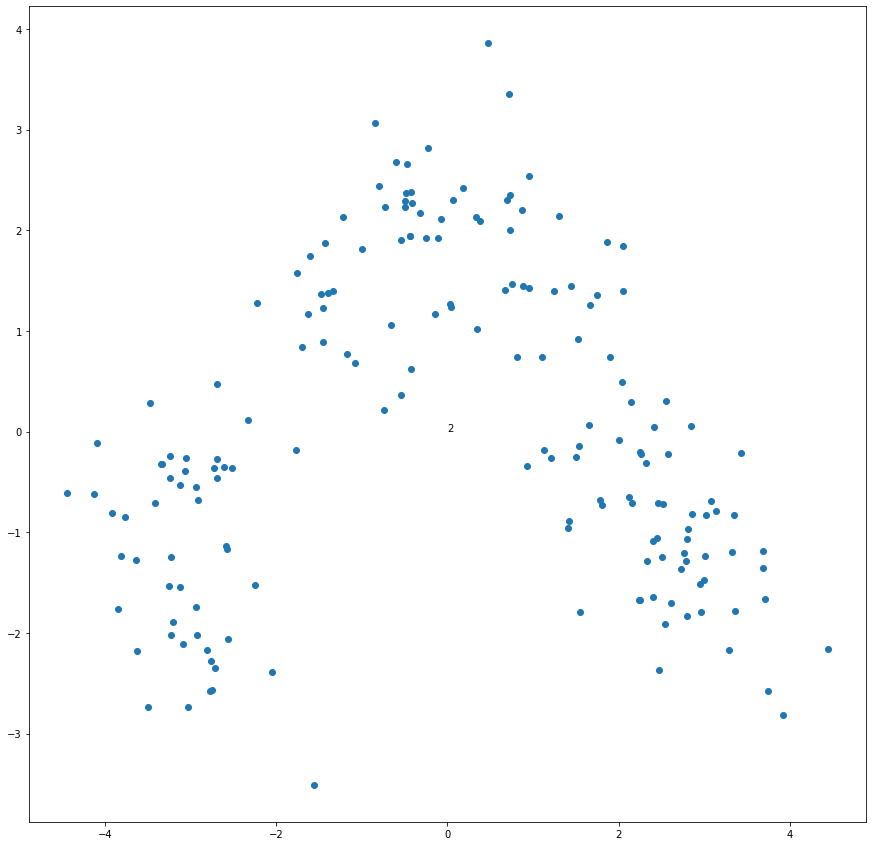

In [103]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(data_pca2['PC1'], data_pca2['PC2'])
ax.annotate(2,(0,0))

for i in np.arange(0,77):
    ax.annotate(df.name[i],(data_pca2.loc[i,'PC1']-0.1,data_pca2.loc[i,'PC2']+0.1))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.savefig('2D_plot.png', dpi=300,bbox_inches='tight')

**Question 4**: According to the scatter plot shown above, are these two principal components good predictors for classifying wine class? Explain why.

Your answer:
